This notebook is intended to plot data from CSmetrics as time series.

Goal 1: plot institutional influence overtime in a given area / venue (e.g. Microsoft vs CMU in PL, or ML)

In [6]:
import os, sys
import pandas as pd
import numpy as np
import pickle
import json,csv
#from datetime import datetime 

%matplotlib inline 

In [2]:
cur_conf = 'icml'
institution_list = 'stanford university,microsoft,carnegie mellon university'
institution_list = institution_list.split(',')

# default year range
year_range = [i for i in range(2007,2017)]
print(year_range)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [3]:
data_dir = '../scores/'
cur_path = '../app/'

# read topic-venue mapping
FILE_CATEGORY = os.path.join(cur_path, "data/venue_category.csv")
## TODO

df_cite = pd.DataFrame(data=None, columns=year_range)
df_pub = pd.DataFrame(data=None, columns=year_range)

# read info on the designated conference(s) into a dataframe
for y in year_range:# year_range:
    # file names look like icml_2007_affiliations.json
    paper_file_name = os.path.join(data_dir, cur_conf+'_'+str(y)+'_affiliations.json')
    cflist = json.load(open(paper_file_name, "r"))
    
    for k,v in cflist.items():
        df_cite.ix[k, y] = v['Citation Count']
        df_pub.ix[k, y] = v['Publication Count']
    #print (cflist, len(cflist), cflist['cornell university'])

df_cite.fillna(value=0, inplace=True)
df_pub.fillna(value=0, inplace=True)
df_cite.head(), df_pub.head() 


(                              2007     2008     2009     2010     2011  \
 university college london   80.400   68.450   62.167    0.000  107.500   
 siemens                     17.667    0.000    2.000    0.000  101.000   
 google                     372.967  413.167  122.964  234.667  128.917   
 aalborg university          29.000    0.000    0.000    0.000    0.000   
 princeton university        29.000   42.000    0.000  238.750   71.667   
 
                               2012     2013      2014      2015     2016  
 university college london  233.800  126.417    41.167    19.667   10.000  
 siemens                      0.000    0.000     0.000     0.000    0.000  
 google                     682.867  334.667  1345.533  1576.833  298.367  
 aalborg university           0.000    0.000     0.000     0.000    0.000  
 princeton university       121.800  111.500    67.800    21.667   77.200  ,
                             2007   2008   2009   2010   2011  2012   2013  \
 university c

[[  840.5     159.667  1426.5      73.4    1481.5     420.733   484.
    229.667    92.833   102.   ]
 [  511.8     220.45    245.167   552.      174.5     848.      416.667
    205.333    87.917    35.333]
 [  507.9     176.667   431.5     496.167   482.      174.3     208.833
    102.567    98.45     55.   ]]


ValueError: x and y must have same first dimension

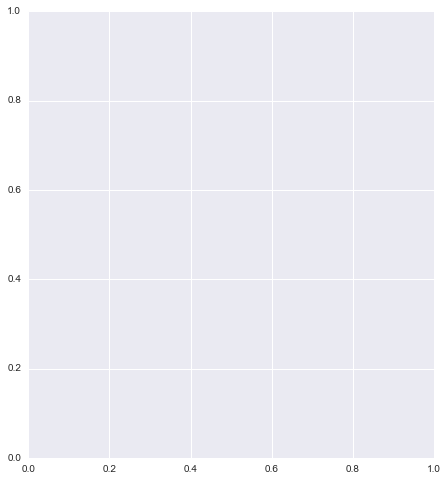

In [11]:
# plot this for a given list of institutions
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
clrs = sns.color_palette("muted")

num_lines = len(institution_list)
#df_cite.ix[institution_list,:].plot(kind='line') #color=clrs[:num_lines]

plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
sns.set_context("talk", font_scale=1.)
sns.set_style("whitegrid")

print(np.array(df_cite.ix[institution_list,:]))
ax1.plot(year_range, np.array(df_cite.ix[institution_list,:]))

In [33]:
df_cite.ix[['microsoft','carnegie mellon university'],:]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
microsoft,511.8,220.450,245.167,552.000,174.5,848.0,416.667,205.333,87.917,35.333
carnegie mellon university,507.9,176.667,431.500,496.167,482.0,174.3,208.833,102.567,98.450,55.000


In [12]:
df_cite[2007]

university college london                               80.400
siemens                                                 17.667
google                                                 372.967
aalborg university                                      29.000
princeton university                                    29.000
peking university                                       43.400
university of minnesota                                 14.500
university of california san francisco                  36.000
courant institute of mathematical sciences              35.000
ecole normale superieure                                25.500
university of michigan                                  15.250
max planck society                                    1006.833
university of california san diego                     157.000
university of geneva                                    22.500
technical university of berlin                          22.667
university of california santa cruz                    